# Convolution : Edge dection kernel 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
from PIL import Image
import numpy as np

### image I/O

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

available img files ['.DS_Store', 'gz2_66.jpg', 'gz2_16.jpg', 'gz2_294617.jpg', 'gz2_18.jpg', 'celeba_1.jpg']


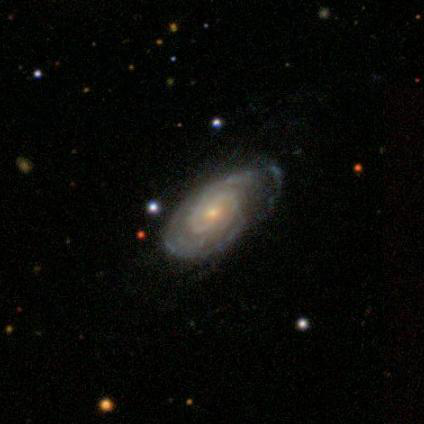

In [3]:
dir_image = '../data/example_images'
print('available img files', os.listdir(dir_image))
filename  = 'gz2_16.jpg'
file_img  = os.path.join(dir_image, filename)

image = Image.open(file_img)
image

(-0.5, 149.5, 149.5, -0.5)

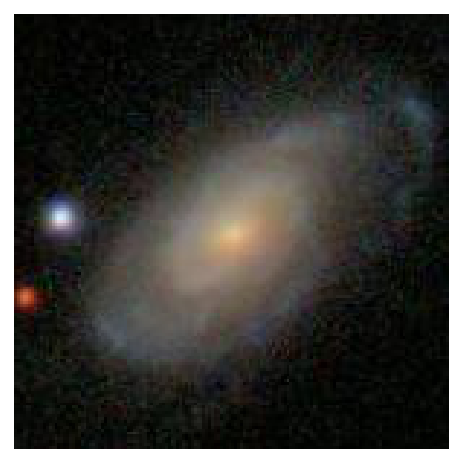

In [4]:
# CenterCrop

image = Image.open(file_img)
transform = transforms.Compose([transforms.CenterCrop(150)])
image = transform(image)
###### plot ######
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.imshow(image)
ax.axis('off')

## Edge Dection in 1D

#### Reference : [Sec 6.2.3 D2L](https://d2l.ai/chapter_convolutional-neural-networks/conv-layer.html)

When we perform the cross-correlation operation with the input, if the horizontally adjacent elements are the same, the output is 0. Otherwise, the output is non-zero.

In [5]:
K = torch.tensor([[1.0, -1.0]])

## Edge Detection in 2D
A designed convolution kernel to detect edges in an image

In [6]:
def image_loader(file_img, transform=None):
    image = Image.open(file_img)
    
    if transform:
        # fake batch dimension required to fit network's input dimensions
        image = transform(image).unsqueeze(0)   
    
    return image.to(device)

In [7]:
transform = transforms.Compose([transforms.CenterCrop(200),
                                transforms.ToTensor(),
                                transforms.Normalize([0.094, 0.0815, 0.063], [0.1303, 0.11, 0.0913])
                                ])

image = image_loader(file_img, transform=transform)
image.shape

torch.Size([1, 3, 200, 200])

(-0.5, 2.5, 2.5, -0.5)

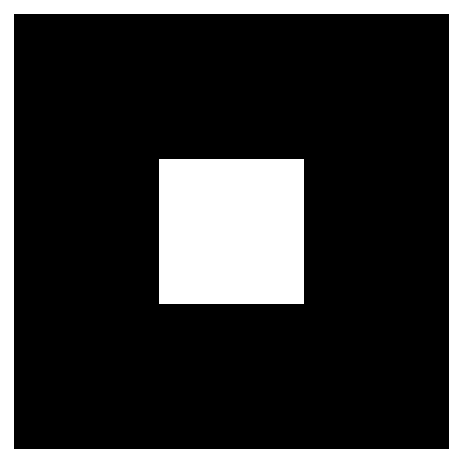

In [8]:
weights = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])

plt.imshow(weights, cmap='gray')
plt.axis('off')

In [9]:
conv1 = nn.Conv2d(3, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv1.weight.shape

torch.Size([1, 3, 3, 3])

In [10]:
weights_3c = np.repeat(weights[np.newaxis,:, :], 3, axis=0)
conv1.weight=nn.Parameter(torch.from_numpy(weights_3c).float().unsqueeze(0))

## Feature map 
### the convolutional layer output

In [11]:
image_convolved = conv1(image)
image_convolved.shape

torch.Size([1, 1, 200, 200])

(-0.5, 199.5, 199.5, -0.5)

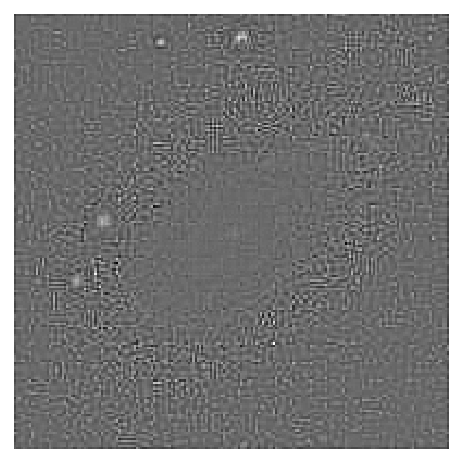

In [12]:
img_npy = image_convolved[0,0,:,:].detach().numpy()
plt.imshow(img_npy, cmap='gray')
plt.axis('off')

# ------ End ------

In [13]:
from PIL import ImageFilter

image = Image.open('../data/example_images/gz2_16.jpg')

filtered = image.filter(ImageFilter.Kernel(
    size=(3, 3),
    kernel=[-1, -1, -1, -1, 8, -1, -1, -1, -1],
    scale=1
))

In [14]:
filtered.show()